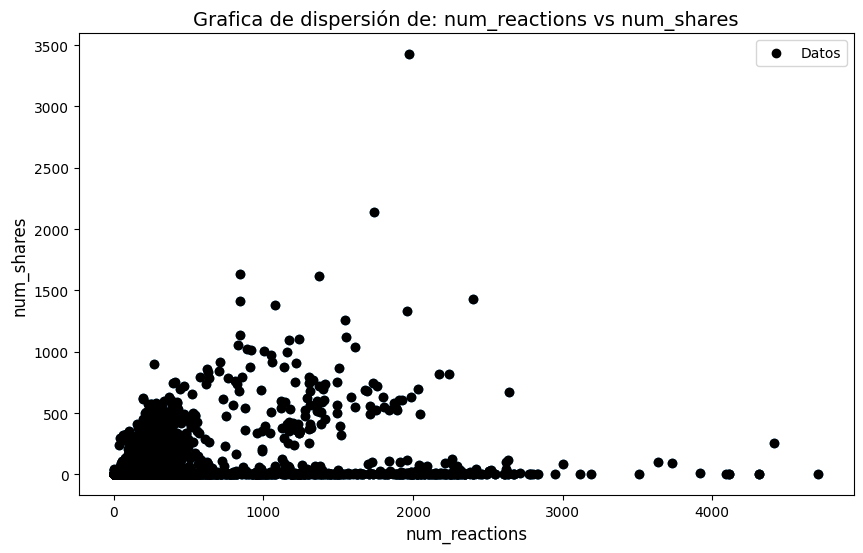

In [125]:
import pandas as pd
import matplotlib.pyplot as plt

def Status(data, columns):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.scatter(data[columns[0]], data[columns[1]])
    ax.set_xlabel(columns[0])
    ax.set_ylabel(columns[1])
    ax.scatter(data[columns[0]], data[columns[1]], c="black", marker='o', label='Datos')
    ax.set_xlabel(columns[0], fontsize=12)
    ax.set_ylabel(columns[1], fontsize=12)
    ax.set_title('Grafica de dispersión de: ' + columns[0] + ' vs ' + columns[1], fontsize=14)
    ax.legend()
    plt.show()

archivo_csv = 'live.csv'
data = pd.read_csv(archivo_csv)
Status(data, columns=['num_reactions', 'num_shares'])